<a href="https://colab.research.google.com/github/denizgulal/Convolutional_Autoencoder/blob/main/autoencoder_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, AveragePooling2D, Flatten, Reshape
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Import

In [15]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [16]:
X_train.shape, y_train.shape, X_train[0]

((50000, 32, 32, 3),
 (50000, 1),
 array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
        

Visualize The Image

[7]


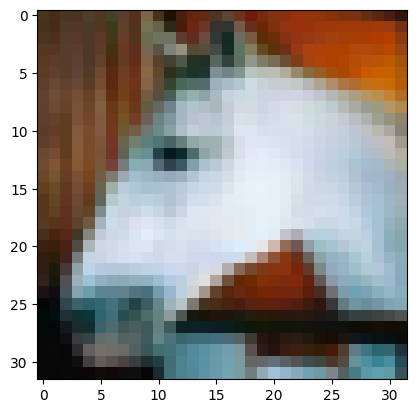

In [17]:
i = np.random.randint(0, y_train.shape[0])
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


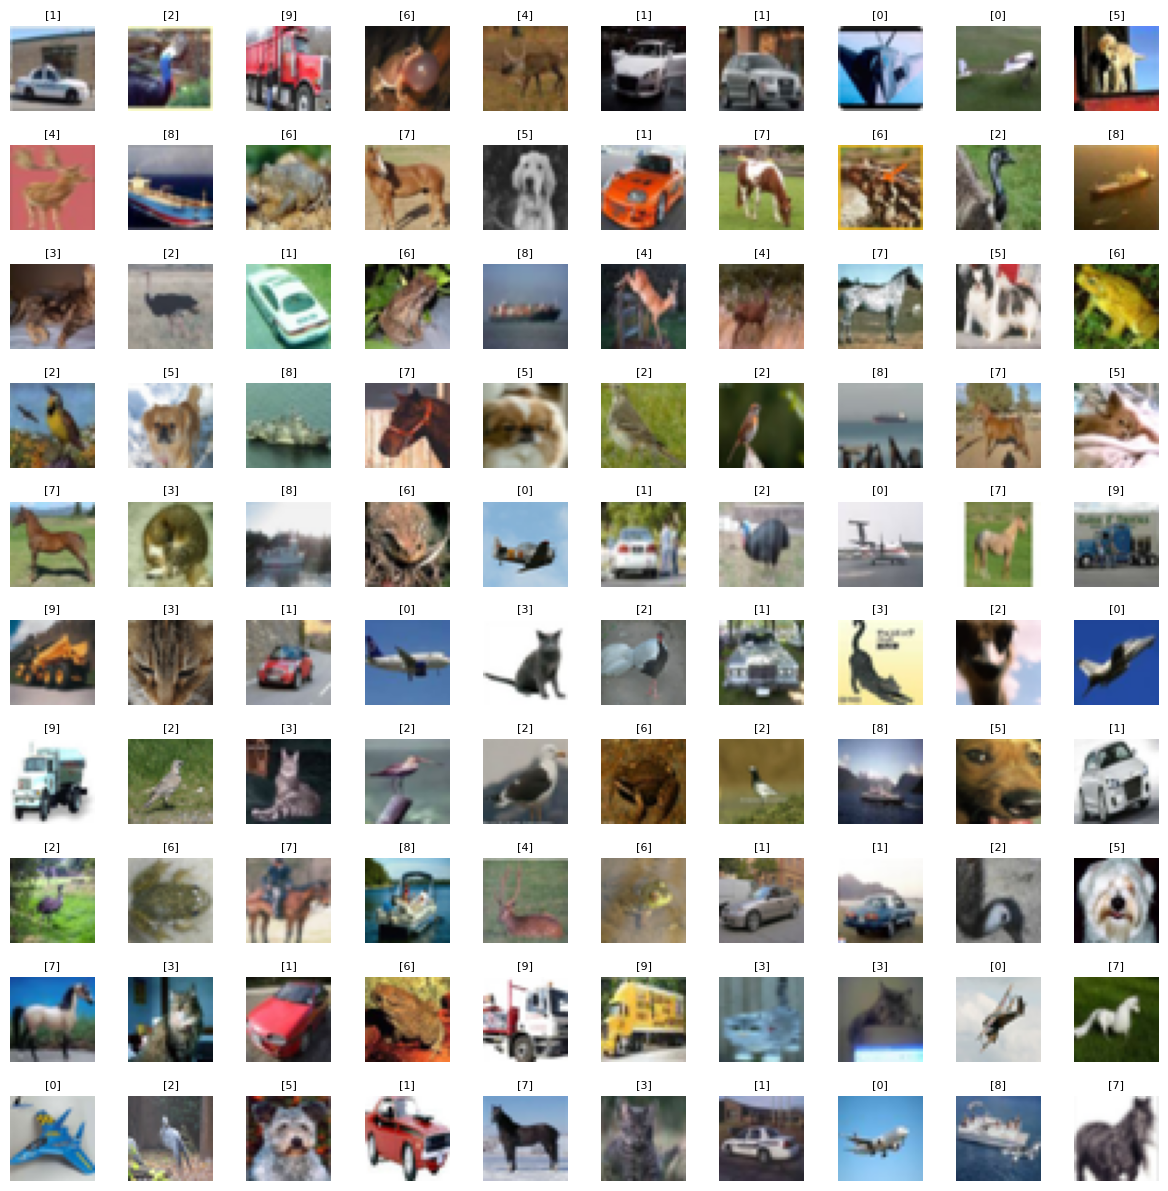

In [18]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 50000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);

Pre Processing of The Images

In [19]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Building and Training Convolutional Autoencoder

In [20]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Encoded image

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 average_pooling2d_3 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

In [21]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 16s 7ms/step - loss: 0.5824 - accuracy: 0.6495
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5681 - accuracy: 0.7194
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5649 - accuracy: 0.7382
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5632 - accuracy: 0.7458
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5622 - accuracy: 0.7516
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5615 - accuracy: 0.7569
Epoch 7/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5610 - accuracy: 0.7593
Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5606 - accuracy: 0.7613
Epoch 9/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5603 - accuracy: 0.7623
Epoch 10/50
1563/1563 [==============================] - 12s 7ms/step - l

Test The Images

In [23]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_5').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 average_pooling2d_3 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        18464     
                                                             

In [24]:
coded_test_images = encoder.predict(X_test)
coded_test_images.shape

313/313 [==============================] - 1s 3ms/step


(10000, 4, 4, 16)

In [25]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

313/313 [==============================] - 1s 3ms/step


(10000, 32, 32, 3)

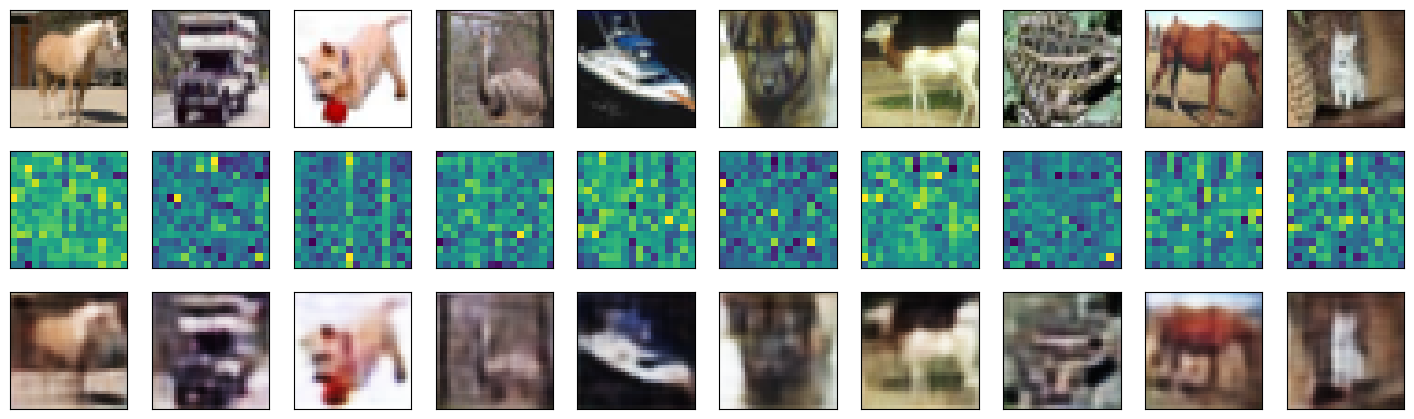

In [26]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))

for i, image_index in enumerate(test_images):
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  # Coded image
  ax = plt.subplot(10,10,i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,16))
  plt.xticks(())
  plt.yticks(())

  # Decoded image
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())